In [1]:
import numpy as np
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
RunFolder = "03Feb2019"
FV_count = 2048

In [3]:
print("FV len :" + str(FV_count))
print("Folder :" + RunFolder )

FV len :2048
Folder :03Feb2019


In [4]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [8]:
Class = 8

In [6]:
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/TR_CombinedFixation_FeatureVector.csv", header=None)
X = dataframe.values
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/TR_Label.csv", header=None)
Ytemp = dataframe.values
Y = Ytemp[:,0]
X.shape


(216, 2048)

In [9]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [10]:
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/Val_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Val_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape


(48, 2048)

In [11]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)

In [32]:
#plt.hist(np.mean(X, axis=1))

In [13]:
from keras import regularizers
########## HYPER PARAMETERS
batch_size = 128 #128
epochs = 300
optimizer = tf.keras.optimizers.Adam()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(80, activation='selu', input_shape=(2048,))) #92 relu
model.add(tf.keras.layers.Dropout(0.30)) #.2
model.add(tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l1(0.4), bias_regularizer=regularizers.l1(0.35))) #48
model.add(tf.keras.layers.Dropout(0.3)) #.2
#model.add(tf.keras.layers.Dense(16, activation='relu'))#WAS removed 
model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                163920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 328       
Total params: 167,488
Trainable params: 167,488
Non-trainable params: 0
_________________________________________________________________
Train on 216 samples, validate on 48 samples
Epoch 1/300
216/216 [==============================]216/216 [==============================


Epoch 41/300
216/216 [==============================]216/216 [==============================] - 0s 235us/step - loss: 62.0724 - acc: 0.2546 - val_loss: 60.6042 - val_acc: 0.3750

Epoch 42/300
216/216 [==============================]216/216 [==============================] - 0s 229us/step - loss: 60.3908 - acc: 0.2639 - val_loss: 58.9679 - val_acc: 0.5000

Epoch 43/300
216/216 [==============================]216/216 [==============================] - 0s 236us/step - loss: 58.7578 - acc: 0.2870 - val_loss: 57.3717 - val_acc: 0.5208

Epoch 44/300
216/216 [==============================]216/216 [==============================] - 0s 236us/step - loss: 57.2450 - acc: 0.2361 - val_loss: 55.8064 - val_acc: 0.4792

Epoch 45/300
216/216 [==============================]216/216 [==============================] - 0s 247us/step - loss: 55.5825 - acc: 0.2500 - val_loss: 54.2636 - val_acc: 0.5000

Epoch 46/300
216/216 [==============================]216/216 [==============================] - 0s 143us


Epoch 87/300
216/216 [==============================]216/216 [==============================] - 0s 117us/step - loss: 10.4655 - acc: 0.3287 - val_loss: 9.9909 - val_acc: 0.3542

Epoch 88/300
216/216 [==============================]216/216 [==============================] - 0s 118us/step - loss: 9.8499 - acc: 0.3796 - val_loss: 9.4269 - val_acc: 0.3958

Epoch 89/300
216/216 [==============================]216/216 [==============================] - 0s 116us/step - loss: 9.2564 - acc: 0.3889 - val_loss: 8.8857 - val_acc: 0.3958

Epoch 90/300
216/216 [==============================]216/216 [==============================] - 0s 115us/step - loss: 8.7309 - acc: 0.3426 - val_loss: 8.3579 - val_acc: 0.4375

Epoch 91/300
216/216 [==============================]216/216 [==============================] - 0s 120us/step - loss: 8.2299 - acc: 0.3333 - val_loss: 7.8459 - val_acc: 0.3958

Epoch 92/300
216/216 [==============================]216/216 [==============================] - 0s 128us/step - l

216/216 [==============================]216/216 [==============================] - 0s 125us/step - loss: 2.1949 - acc: 0.3889 - val_loss: 2.2864 - val_acc: 0.3333

Epoch 134/300
216/216 [==============================]216/216 [==============================] - 0s 145us/step - loss: 2.2101 - acc: 0.2778 - val_loss: 2.2840 - val_acc: 0.3750

Epoch 135/300
216/216 [==============================]216/216 [==============================] - 0s 117us/step - loss: 2.1823 - acc: 0.3333 - val_loss: 2.2795 - val_acc: 0.4167

Epoch 136/300
216/216 [==============================]216/216 [==============================] - 0s 122us/step - loss: 2.1845 - acc: 0.3380 - val_loss: 2.2787 - val_acc: 0.3958

Epoch 137/300
216/216 [==============================]216/216 [==============================] - 0s 137us/step - loss: 2.2164 - acc: 0.3333 - val_loss: 2.2758 - val_acc: 0.4583

Epoch 138/300
216/216 [==============================]216/216 [==============================] - 0s 124us/step - loss: 2.192

216/216 [==============================]216/216 [==============================] - 0s 128us/step - loss: 2.1222 - acc: 0.3426 - val_loss: 2.2392 - val_acc: 0.4583

Epoch 180/300
216/216 [==============================]216/216 [==============================] - 0s 117us/step - loss: 2.0939 - acc: 0.3935 - val_loss: 2.2353 - val_acc: 0.4792

Epoch 181/300
216/216 [==============================]216/216 [==============================] - 0s 119us/step - loss: 2.0987 - acc: 0.3565 - val_loss: 2.2348 - val_acc: 0.4792

Epoch 182/300
216/216 [==============================]216/216 [==============================] - 0s 121us/step - loss: 2.0844 - acc: 0.3380 - val_loss: 2.2403 - val_acc: 0.4375

Epoch 183/300
216/216 [==============================]216/216 [==============================] - 0s 119us/step - loss: 2.0691 - acc: 0.3889 - val_loss: 2.2437 - val_acc: 0.5208

Epoch 184/300
216/216 [==============================]216/216 [==============================] - 0s 131us/step - loss: 2.082

216/216 [==============================]216/216 [==============================] - 0s 120us/step - loss: 2.0437 - acc: 0.3704 - val_loss: 2.2068 - val_acc: 0.4375

Epoch 226/300
216/216 [==============================]216/216 [==============================] - 0s 120us/step - loss: 2.1073 - acc: 0.3472 - val_loss: 2.2162 - val_acc: 0.4375

Epoch 227/300
216/216 [==============================]216/216 [==============================] - 0s 117us/step - loss: 2.0934 - acc: 0.3472 - val_loss: 2.2259 - val_acc: 0.4375

Epoch 228/300
216/216 [==============================]216/216 [==============================] - 0s 125us/step - loss: 2.0242 - acc: 0.4213 - val_loss: 2.2117 - val_acc: 0.5000

Epoch 229/300
216/216 [==============================]216/216 [==============================] - 0s 149us/step - loss: 2.0316 - acc: 0.4120 - val_loss: 2.1933 - val_acc: 0.5000

Epoch 230/300
216/216 [==============================]216/216 [==============================] - 0s 342us/step - loss: 1.999

216/216 [==============================]216/216 [==============================] - 0s 327us/step - loss: 1.8844 - acc: 0.4907 - val_loss: 2.1731 - val_acc: 0.4167

Epoch 272/300
216/216 [==============================]216/216 [==============================] - 0s 261us/step - loss: 1.8833 - acc: 0.4815 - val_loss: 2.1448 - val_acc: 0.5000

Epoch 273/300
216/216 [==============================]216/216 [==============================] - 0s 269us/step - loss: 1.9136 - acc: 0.4583 - val_loss: 2.1615 - val_acc: 0.4792

Epoch 274/300
216/216 [==============================]216/216 [==============================] - 0s 321us/step - loss: 1.8875 - acc: 0.4352 - val_loss: 2.1907 - val_acc: 0.4167

Epoch 275/300
216/216 [==============================]216/216 [==============================] - 0s 326us/step - loss: 1.8535 - acc: 0.5046 - val_loss: 2.1882 - val_acc: 0.4375

Epoch 276/300
216/216 [==============================]216/216 [==============================] - 0s 290us/step - loss: 1.862

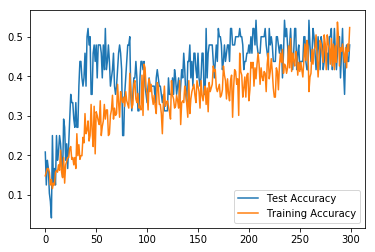

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

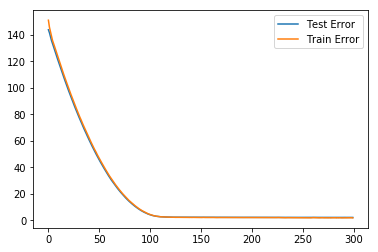

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Test Error")
plt.plot(history.history['loss'], label="Train Error")
plt.legend()

In [16]:
import datetime
now = datetime.datetime.now()
TempName = str(now.day) +str(now.month)+ str(now.hour) + str(now.minute)

# save model to JSON
model_json = model.to_json()
with open(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/" + TempName + "Predict_DNN_Resnet2048FV_8Class.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
model.save_weights(FilePath + "Runs/" + RunFolder +  "/ModelsAndWeights/" + TempName + "Predict_DNN_Resnet2048FV_8Class.h5")
print("Saved model to disk")

Saved model to disk
